<a href="https://colab.research.google.com/github/Wolframettes/Noise/blob/master/Perlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#implement perlin noise

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import math as m

In [ ]:
from celluloid import Camera

In [ ]:
!pip install celluloid

In [ ]:
def generate_lattice0(n):
    lattice = np.zeros([n,n], dtype='float')
    return lattice

In [ ]:
def generate_random_vectors(n):
    mapa = {}
    for i in range(0,n):
        for j in range(0,n):
            vetor = np.random.uniform(low=-1,high=1,size=2)
            modulo = m.sqrt(vetor[0]**2+vetor[1]**2)
            vetor = vetor/modulo
            mapa[(i,j)] = tuple(vetor) 
    return mapa

In [ ]:
def dotGridGradient(ix,iy,x,y,gradient):
  dx = x - ix
  dy = y - iy
  return dx*gradient[(ix,iy)][0] + dy*gradient[(ix,iy)][1]


In [ ]:
def lerp(a0, a1, w):
  return (1.0 - w)*a0 + w*a1

In [ ]:
def perlinCTE(x,y,gradient):

  x0 = x
  x1 = x + 1
  y0 = y
  y1 = y + 1

  # linha diferente do original que é
  #// Determine interpolation weights
  #  // Could also use higher order polynomial/s-curve here
  #  float sx = x - (float)x0;
  #  float sy = y - (float)y0;
  
  sx = 0.5
  sy = 0.5

  n0 = dotGridGradient(x0, y0, x, y, gradient)
  n1 = dotGridGradient(x1, y0, x, y, gradient)
  ix0 = lerp(n0, n1, sx)

  n0 = dotGridGradient(x0, y1, x, y, gradient)
  n1 = dotGridGradient(x1, y1, x, y, gradient)
  ix1 = lerp(n0, n1, sx)

  value = lerp(ix0, ix1, sy)


  return value

In [ ]:
def perlinCos(x,y,gradient):

  x0 = x
  x1 = x + 1
  y0 = y
  y1 = y + 1
  
  sx = abs(m.cos(x))
  sy = abs(m.cos(y))

  n0 = dotGridGradient(x0, y0, x, y, gradient)
  n1 = dotGridGradient(x1, y0, x, y, gradient)
  ix0 = lerp(n0, n1, sx)

  n0 = dotGridGradient(x0, y1, x, y, gradient)
  n1 = dotGridGradient(x1, y1, x, y, gradient)
  ix1 = lerp(n0, n1, sx)

  value = lerp(ix0, ix1, sy)


  return value

In [ ]:
grid = generate_lattice0(2000)

In [ ]:
mapa = generate_random_vectors(2000)



In [ ]:
def perlinCTEatgrid(grid, gradient):
    fim = grid
    for i in range(np.shape(grid)[0]-1):
      for j in range(np.shape(grid)[1]-1):
        fim[i][j] = perlinCTE(i,j, gradient)
    return fim

def perlinCosatgrid(grid, gradient):
    fim = grid
    for i in range(np.shape(grid)[0]-1):
      for j in range(np.shape(grid)[1]-1):
        fim[i][j] = perlinCos(i,j, gradient)
    return fim

In [ ]:
grid = perlinCTEatgrid(grid, mapa)

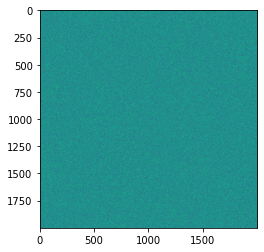

In [ ]:
plt.imshow(grid, cmap='viridis' )

In [ ]:
grid = perlinCosatgrid(grid, mapa)

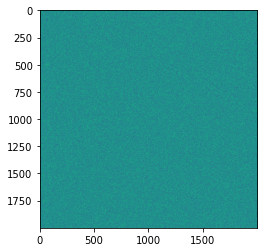

In [ ]:
plt.imshow(grid, cmap='viridis' )

In [ ]:
perlinCTE(5,300, mapa)

-0.15600557045341915

In [ ]:
dotGridGradient(1,2,3,4,mapa)

0.1448107151206437

In [ ]:


// Compute Perlin noise at coordinates x, y
float perlin(float x, float y) {

    // Determine grid cell coordinates
    int x0 = (int)x;
    int x1 = x0 + 1;
    int y0 = (int)y;
    int y1 = y0 + 1;

    // Determine interpolation weights
    // Could also use higher order polynomial/s-curve here
    float sx = x - (float)x0;
    float sy = y - (float)y0;

    // Interpolate between grid point gradients
    float n0, n1, ix0, ix1, value;

    n0 = dotGridGradient(x0, y0, x, y);
    n1 = dotGridGradient(x1, y0, x, y);
    ix0 = lerp(n0, n1, sx);

    n0 = dotGridGradient(x0, y1, x, y);
    n1 = dotGridGradient(x1, y1, x, y);
    ix1 = lerp(n0, n1, sx);

    value = lerp(ix0, ix1, sy);
    return value;
}

In [ ]:
// Computes the dot product of the distance and gradient vectors.
float dotGridGradient(int ix, int iy, float x, float y) {

    // Precomputed (or otherwise) gradient vectors at each grid node
    extern float Gradient[IYMAX][IXMAX][2];

    // Compute the distance vector
    float dx = x - (float)ix;
    float dy = y - (float)iy;

    // Compute the dot-product
    return (dx*Gradient[iy][ix][0] + dy*Gradient[iy][ix][1]);
}

In [ ]:
(1,2)[0]

1